## Machine Learning CA1 | Louis Wilkie | sba22529

### Introduction

#### Library Imports

In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

#### Dataset Load

In [2]:
# dataset load
df = pd.read_csv("Invistico_Airline.csv")

In [3]:
sns.set_palette("viridis")

#### Selection of Functions Used

In [4]:
# countplot
def countplot(df, var, x_size=4, y_size=4, title="Countplot", x_label="Values", y_label="Count",
             rotate_xticks=0, ax=None):
    if title == "Countplot":
        title = f"Countplot of {var}"

    if ax is None:
        fig, ax = plt.subplots(figsize=(x_size, y_size))

    sns.countplot(data=df, x=var, ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotate_xticks)
    ax.set_title(title)

    if ax is None:
        plt.show()

In [5]:
# histogram
def histogram(df, var, x_size=4, y_size=4, x_label="Values", y_label="Frequency",
              bins=10, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(x_size, y_size))
    
    sns.histplot(data=df, x=var, kde=False, bins=bins, color='green', ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = f"Histogram of {var}"
    ax.set_title(title)
    
    if ax is None:
        plt.show()

In [6]:
# Boxplot
def boxplot(df, var, x_size=4, y_size=4, x_label="Values", y_label="Frequency", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(x_size, y_size))

    sns.boxplot(data=df, x=var, ax=ax, color='skyblue')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    title = f"Boxplot of {var}"
    ax.set_title(title)
    
    if ax is None:
        plt.show()

In [7]:
# confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="RdBu", fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

### Data Exploration

In [8]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [9]:
df.shape

(129880, 23)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1981.409055,1027.115606,50.0,1359.0,1925.0,2544.0,6951.0
Seat comfort,129880.0,2.838597,1.392983,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,2.990645,1.527224,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,2.851994,1.443729,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.990422,1.305970,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129880.0,3.249130,1.318818,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129880.0,3.383477,1.346059,0.0,2.0,4.0,4.0,5.0
Online support,129880.0,3.519703,1.306511,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129880.0,3.472105,1.305560,0.0,2.0,4.0,5.0,5.0


In [11]:
df.describe(include="object").T

,count,unique,top,freq
satisfaction,129880,2,satisfied,71087
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [13]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [14]:
# percentage of missing values
df["Arrival Delay in Minutes"].isnull().sum()/len(df) * 100

0.3025870033877425

In [15]:
df = df.dropna()
df = df.reset_index(drop=True)

In [16]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

#### Correlations

correlation shape: (18, 18)


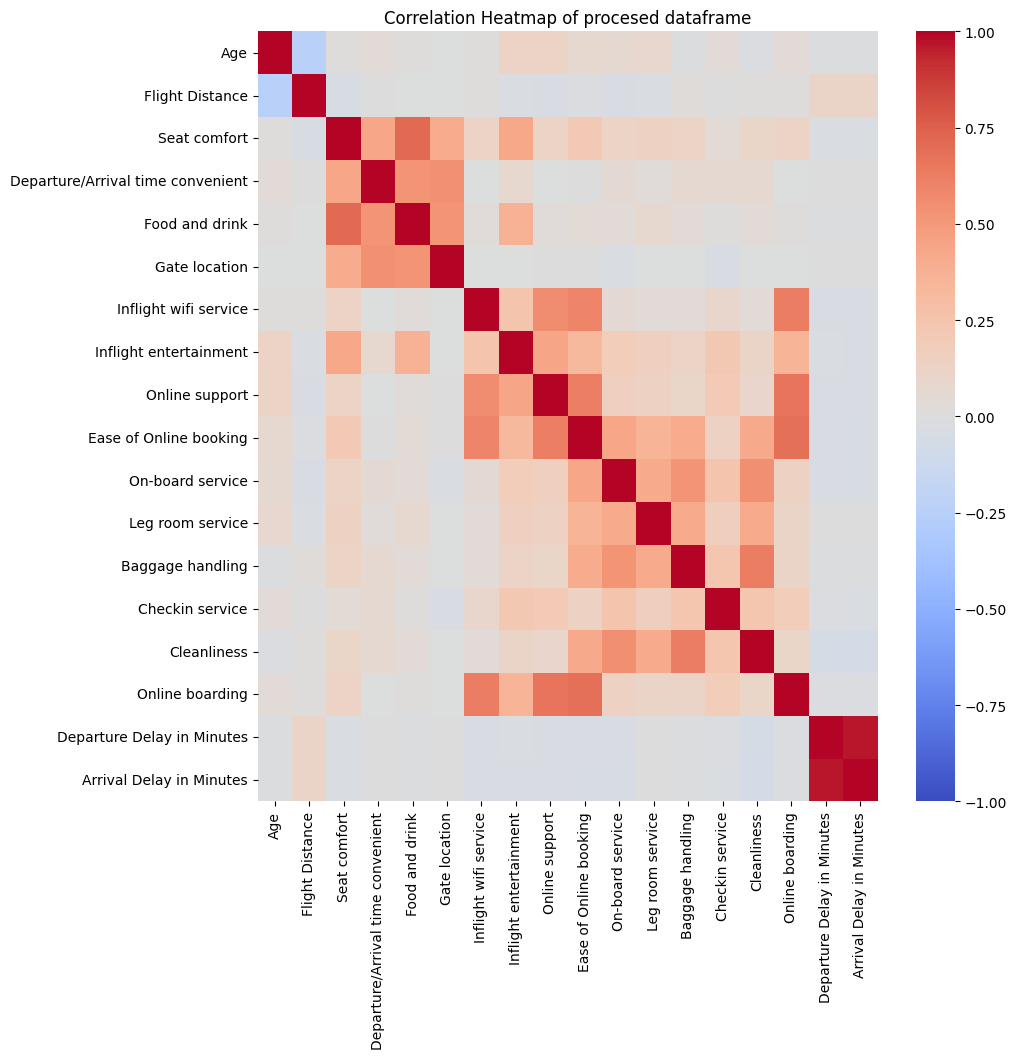

In [17]:
# correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(f"correlation shape: {correlation_matrix.shape}")

# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of procesed dataframe')
plt.show()

#### Flight Time Difference

In [18]:
# correlation of delays
df["Departure Delay in Minutes"].corr(df["Arrival Delay in Minutes"])

0.9652911835463197

In [19]:
# bin edges and labels
bin_edges = [-1, 1, float('inf')]
departure_labels = ['no delay', 'delayed departure']
arrival_labels = ['no delay', 'delayed arrival']

# flight speed binned
df['delayed_departure'] = pd.cut(df['Departure Delay in Minutes'], bins=bin_edges, labels=departure_labels)
df['delayed_arrival'] = pd.cut(df['Arrival Delay in Minutes'], bins=bin_edges, labels=arrival_labels)

In [20]:
df['delayed_departure'] 

0                  no delay
1         delayed departure
2                  no delay
3                  no delay
4                  no delay
                ...        
129482             no delay
129483    delayed departure
129484    delayed departure
129485    delayed departure
129486    delayed departure
Name: delayed_departure, Length: 129487, dtype: category
Categories (2, object): ['no delay' < 'delayed departure']

In [21]:
# flight time difference from schedule
df["flight_time_difference"] = df["Departure Delay in Minutes"] - df["Arrival Delay in Minutes"]
df["flight_time_difference"].describe()

count    129487.000000
mean         -0.447744
std          10.078293
min        -234.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          54.000000
Name: flight_time_difference, dtype: float64

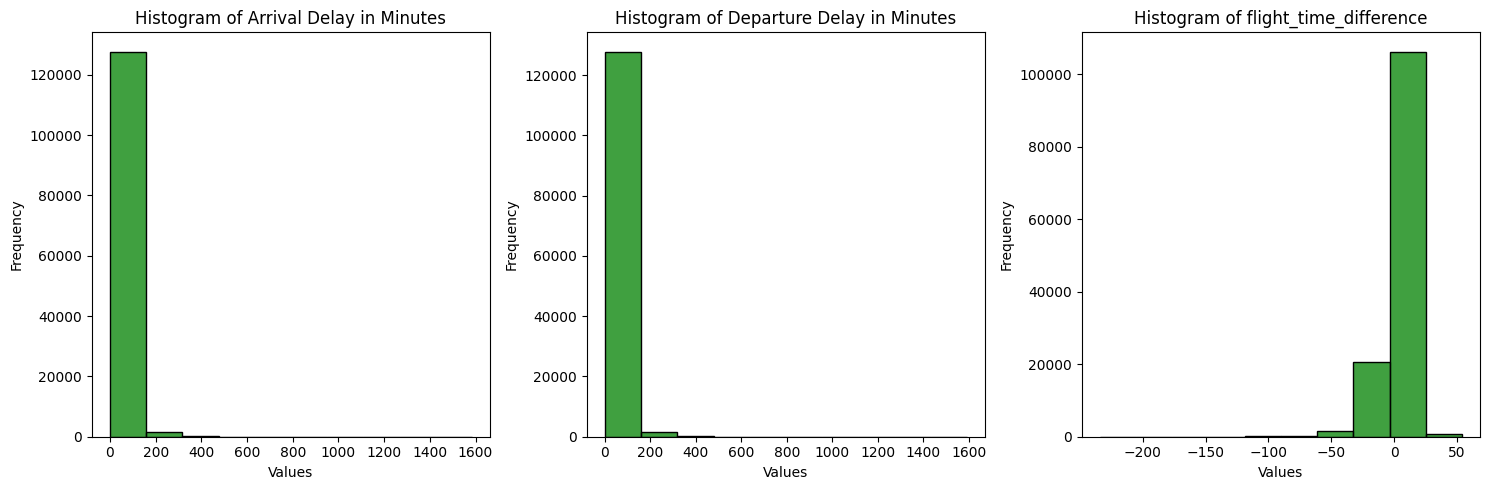

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0] = histogram(df, "Arrival Delay in Minutes", ax=axs[0])
axs[1] = histogram(df, "Departure Delay in Minutes", ax=axs[1])
axs[2] = histogram(df, "flight_time_difference", ax=axs[2])

plt.tight_layout()
plt.show()

In [23]:
# arrival dropped as the signal is now captured in new column
df = df.drop("Arrival Delay in Minutes", axis=1)

In [24]:
df["flight_time_difference"]

0          0.0
1          5.0
2          0.0
3          0.0
4          0.0
          ... 
129482     0.0
129483     2.0
129484    -8.0
129485   -12.0
129486    -1.0
Name: flight_time_difference, Length: 129487, dtype: float64

In [25]:
# bin edges and labels
bin_edges = [-float('inf'), 0, 1, float('inf')]
speed_labels = ['slower', 'average', 'quicker']

# flight speed binned
df['flight_speed'] = pd.cut(df['flight_time_difference'], bins=bin_edges, labels=speed_labels)

In [26]:
df["flight_speed"].value_counts()

flight_speed
slower     92078
quicker    33199
average     4210
Name: count, dtype: int64

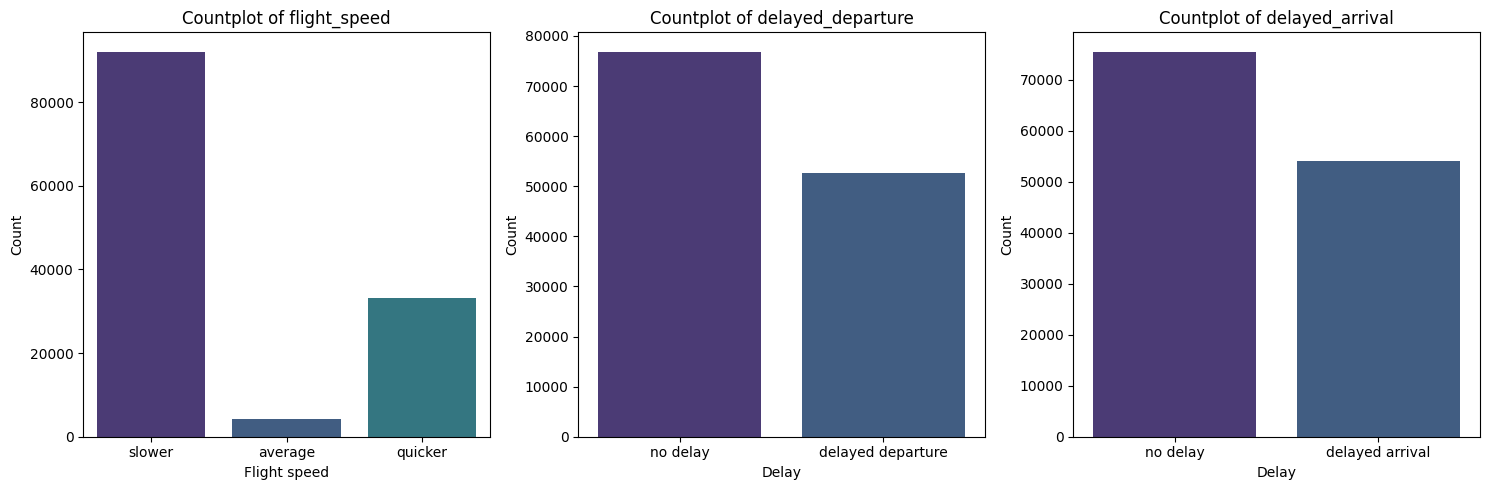

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0] = countplot(df, "flight_speed", x_label="Flight speed", ax=axs[0])
axs[1] = countplot(df, "delayed_departure", x_label="Delay", ax=axs[1])
axs[2] = countplot(df, "delayed_arrival", x_label="Delay", ax=axs[2])

plt.tight_layout()
plt.show()

In [28]:
# departure delay
df["delayed_departure"].value_counts()

delayed_departure
no delay             76880
delayed departure    52607
Name: count, dtype: int64

In [29]:
# arrival delay
df["delayed_arrival"].value_counts()

delayed_arrival
no delay           75500
delayed arrival    53987
Name: count, dtype: int64

In [30]:
contingency_table = pd.crosstab(df["delayed_departure"], df["delayed_arrival"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

In [31]:
contingency_table

delayed_arrival,no delay,delayed arrival
delayed_departure,,
no delay,63434,13446
delayed departure,12066,40541


In [32]:
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared statistic: 45597.53987326902
p-value: 0.0
Degrees of freedom: 1
Expected frequencies: [[44826.43045248 32053.56954752]
 [30673.56954752 21933.43045248]]


In [33]:
df['delays'] = df['delayed_departure'].astype(str) + " & " + df['delayed_arrival'].astype(str)

In [34]:
mapping_dict = {'no delay & no delay': 'no delay', 'delayed departure & no delay': 'delayed departure', 'no delay & delayed arrival': 'delayed arrival', 'delayed departure & delayed arrival': 'both delayed'}

In [35]:
df['delays'] = df['delays'].map(mapping_dict).fillna(df['delays'])
df['delays']

0             no delay
1         both delayed
2             no delay
3             no delay
4             no delay
              ...     
129482        no delay
129483    both delayed
129484    both delayed
129485    both delayed
129486    both delayed
Name: delays, Length: 129487, dtype: object

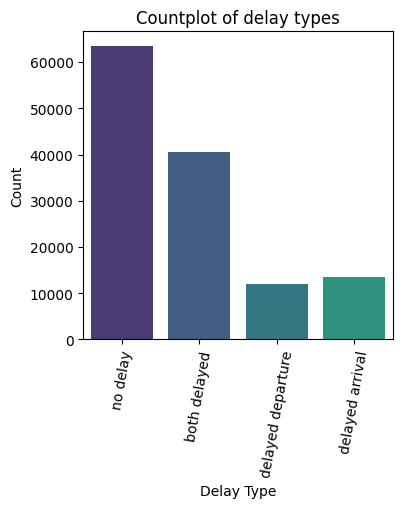

In [36]:
countplot(df, "delays", title="Countplot of delay types", x_label="Delay Type", rotate_xticks=80)

In [37]:
# drop columns
df = df.drop(["delayed_departure", "delayed_arrival"], axis=1)

#### Continuous Variables

In [38]:
print(f"Age min: {df['Age'].min()}")
print(f"Age max: {df['Age'].max()}")
print(f"Flight Distance min: {df['Flight Distance'].min()}")
print(f"Flight Distance max: {df['Flight Distance'].max()}")

Age min: 7
Age max: 85
Flight Distance min: 50
Flight Distance max: 6951


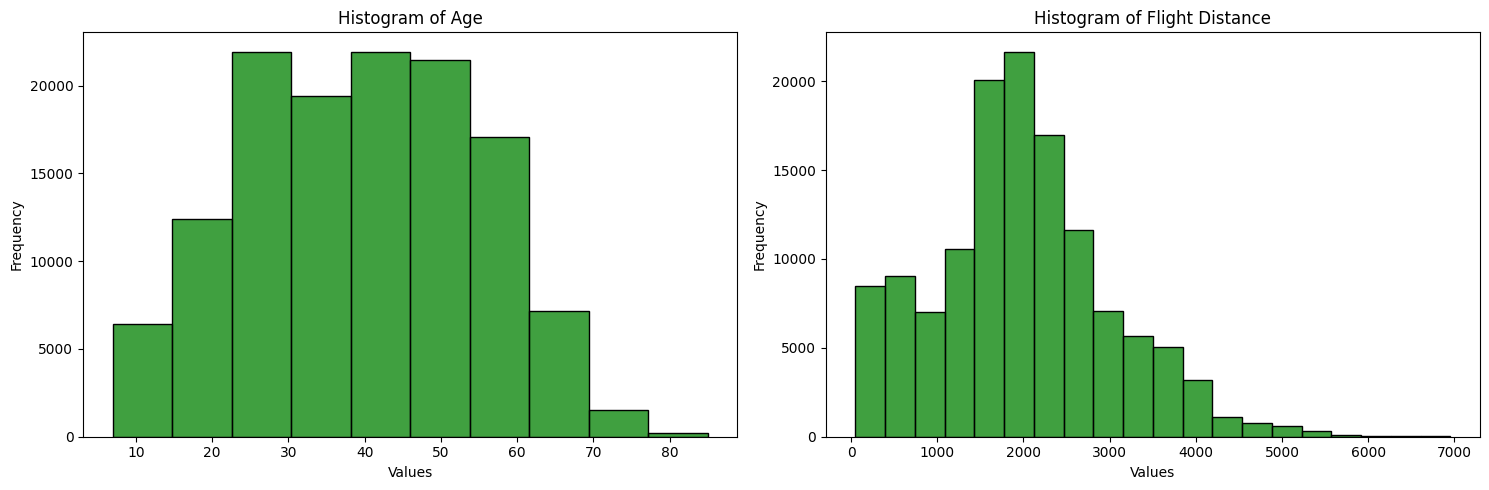

In [39]:
# histograms
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0] = histogram(df, "Age", ax=axs[0])
axs[1] = histogram(df, "Flight Distance", bins=20, ax=axs[1])

plt.tight_layout()
plt.show()

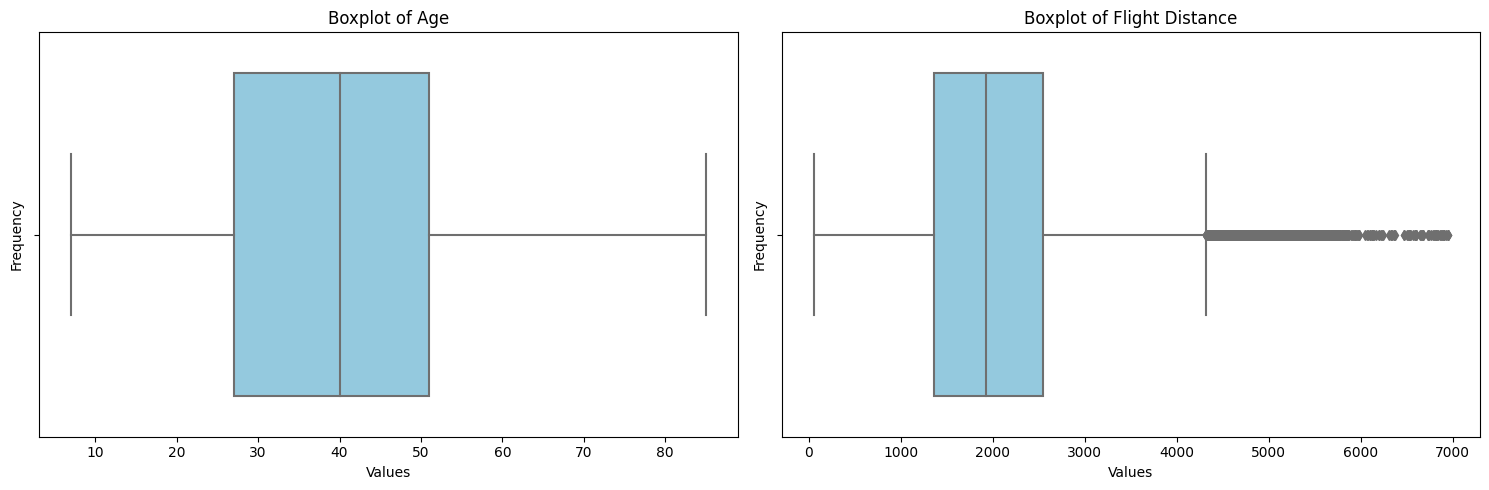

In [40]:
# boxplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


axs[0] = boxplot(df, 'Age', ax=axs[0])
axs[1] = boxplot(df, 'Flight Distance', ax=axs[1])

plt.tight_layout()
plt.show()

#### Ranks

In [41]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,flight_time_difference,flight_speed,delays
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,3,0,3,5,3,2,0,0.0,slower,no delay
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,4,4,4,2,3,2,310,5.0,quicker,both delayed
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,3,3,4,4,4,2,0,0.0,slower,no delay
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,1,0,1,4,1,3,0,0.0,slower,no delay
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,2,0,2,4,2,5,0,0.0,slower,no delay


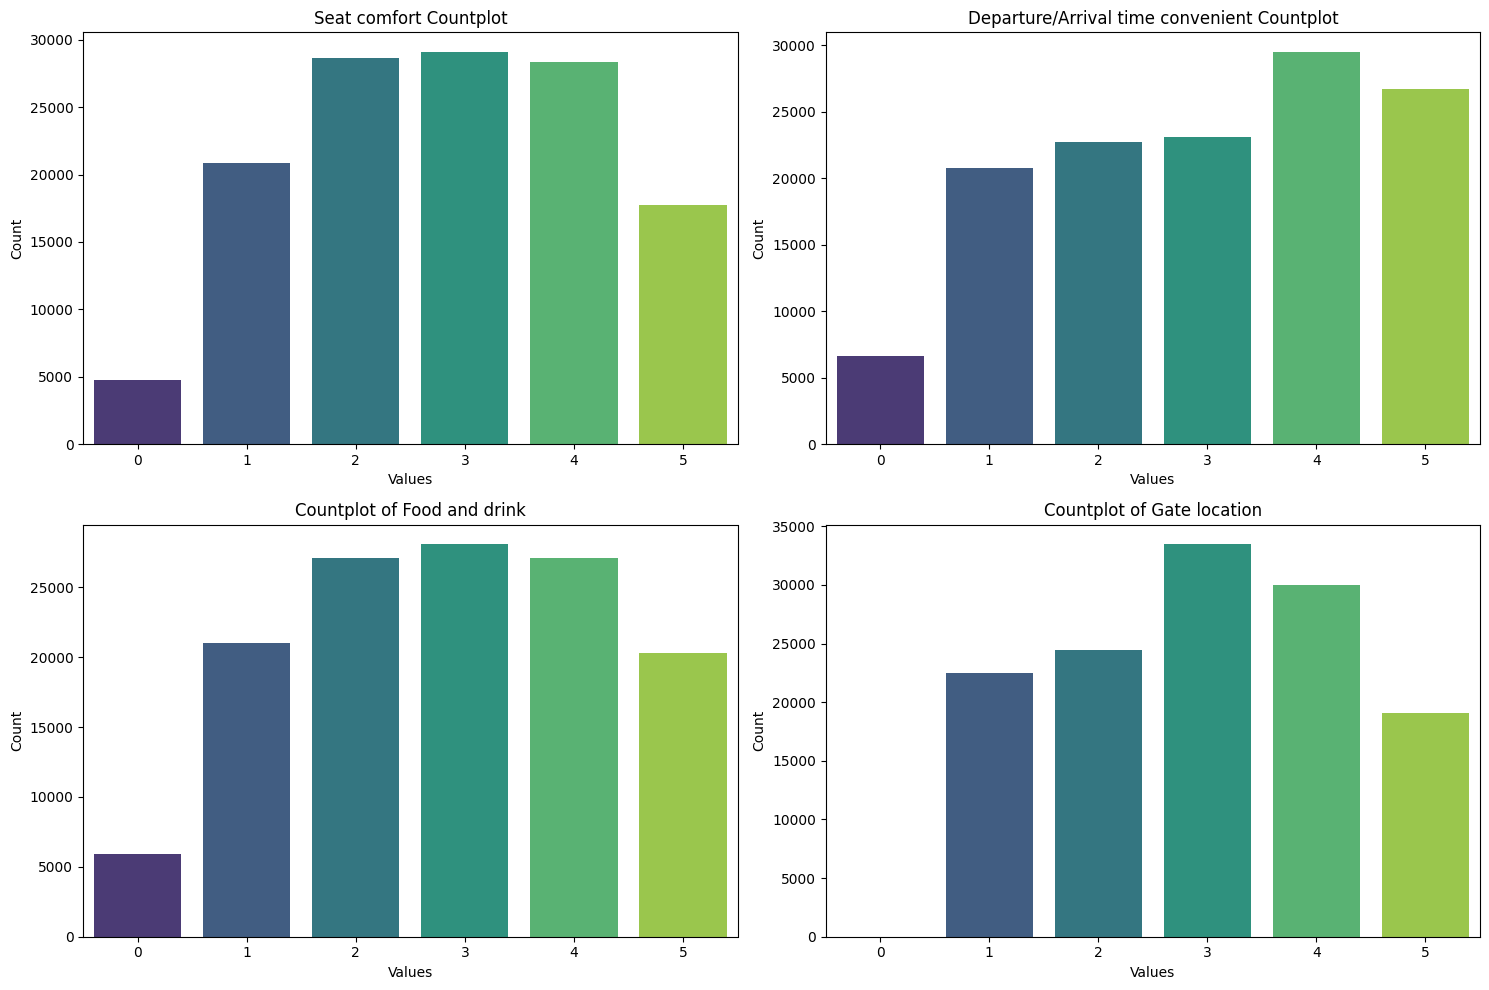

In [42]:
# countplot of correlated facilities
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0] = countplot(df, "Seat comfort", title="Seat comfort Countplot", ax=axs[0, 0])
axs[0, 1] = countplot(df, "Departure/Arrival time convenient", title="Departure/Arrival time convenient Countplot", ax=axs[0, 1])
axs[1, 0] = countplot(df, "Food and drink", ax=axs[1, 0])
axs[1, 1] = countplot(df, "Gate location", ax=axs[1, 1])

plt.tight_layout()
plt.show()

In [43]:
# averaging these columns
df["avg_amenities_ratings"] = df[['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location']].mean(axis=1)

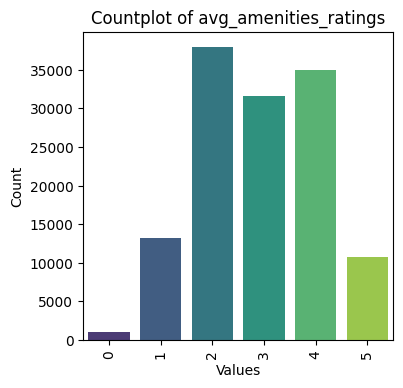

In [44]:
df['avg_amenities_ratings'] = df['avg_amenities_ratings'].round().astype(int)
countplot(df, "avg_amenities_ratings", ax=axs[1, 1], rotate_xticks=90)

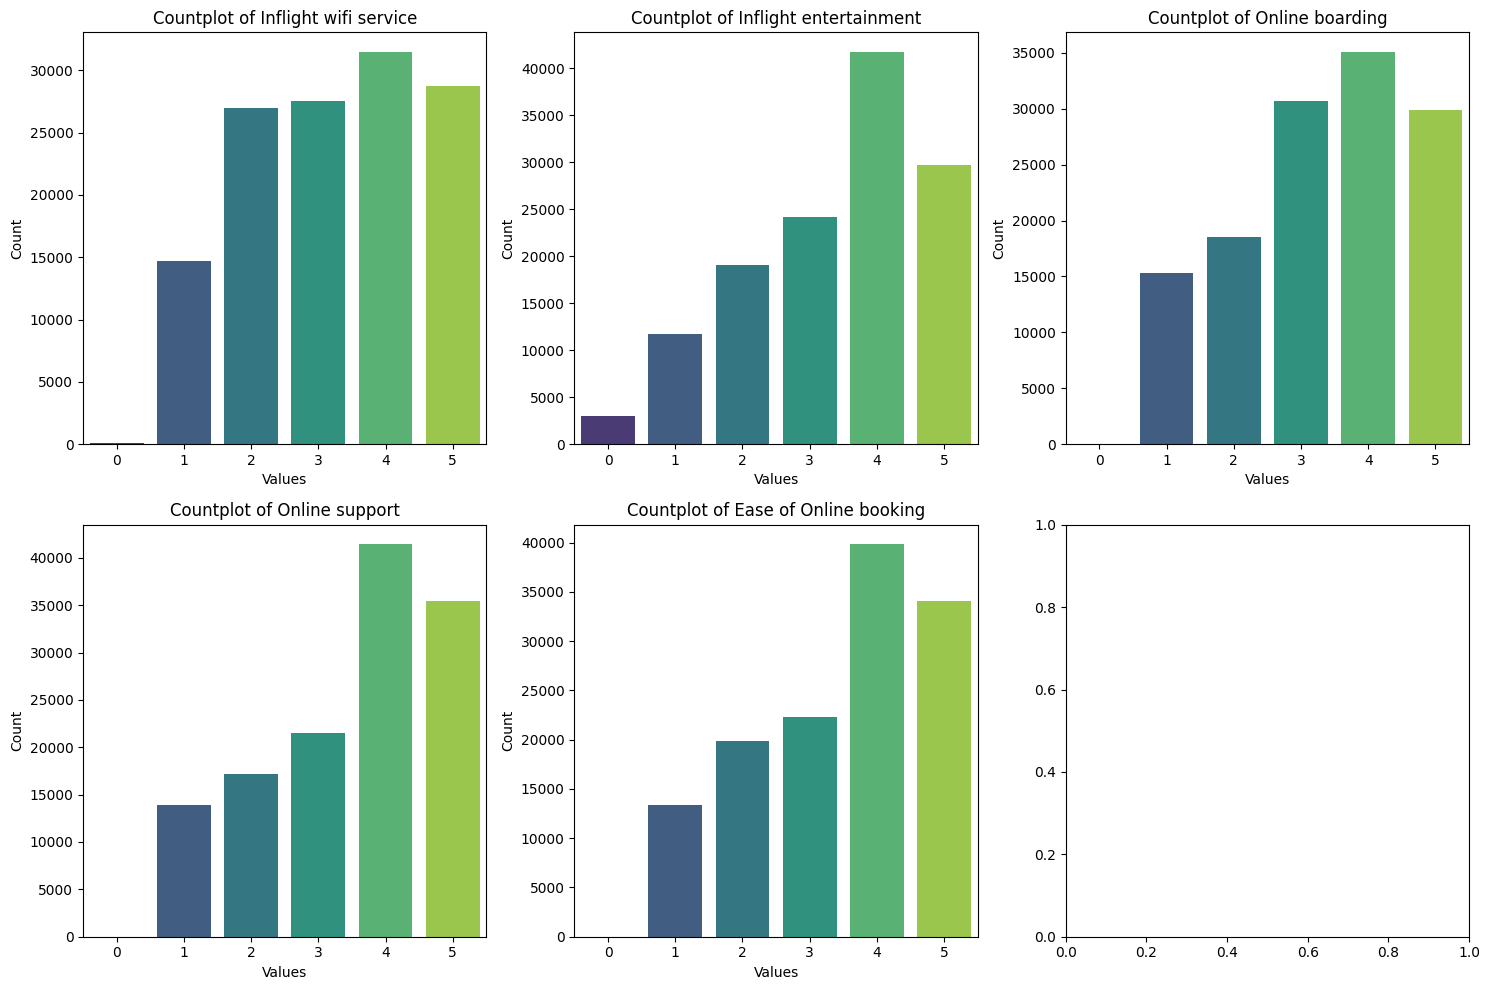

In [45]:
# countplot of correlated online services
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

axs[0, 0] = countplot(df, "Inflight wifi service", ax=axs[0, 0])
axs[0, 1] = countplot(df, "Inflight entertainment", ax=axs[0, 1])
axs[0, 2] = countplot(df, "Online boarding", ax=axs[0, 2])
axs[1, 0] = countplot(df, "Online support", ax=axs[1, 0])
axs[1, 1] = countplot(df, "Ease of Online booking", ax=axs[1, 1])

plt.tight_layout()
plt.show()

In [46]:
df["avg_online_services"] = df[['Inflight wifi service', 'Inflight entertainment', 'Online boarding', 'Online support', 'Ease of Online booking']].mean(axis=1)

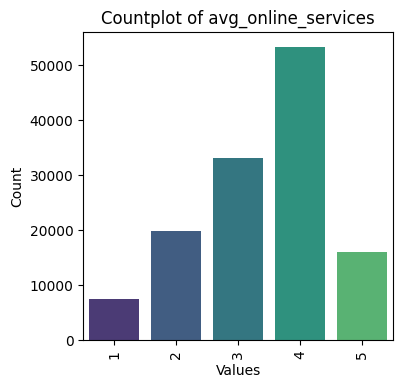

In [47]:
df['avg_online_services'] = df['avg_online_services'].round().astype(int)
countplot(df, "avg_online_services", ax=axs[1, 1], rotate_xticks=90)

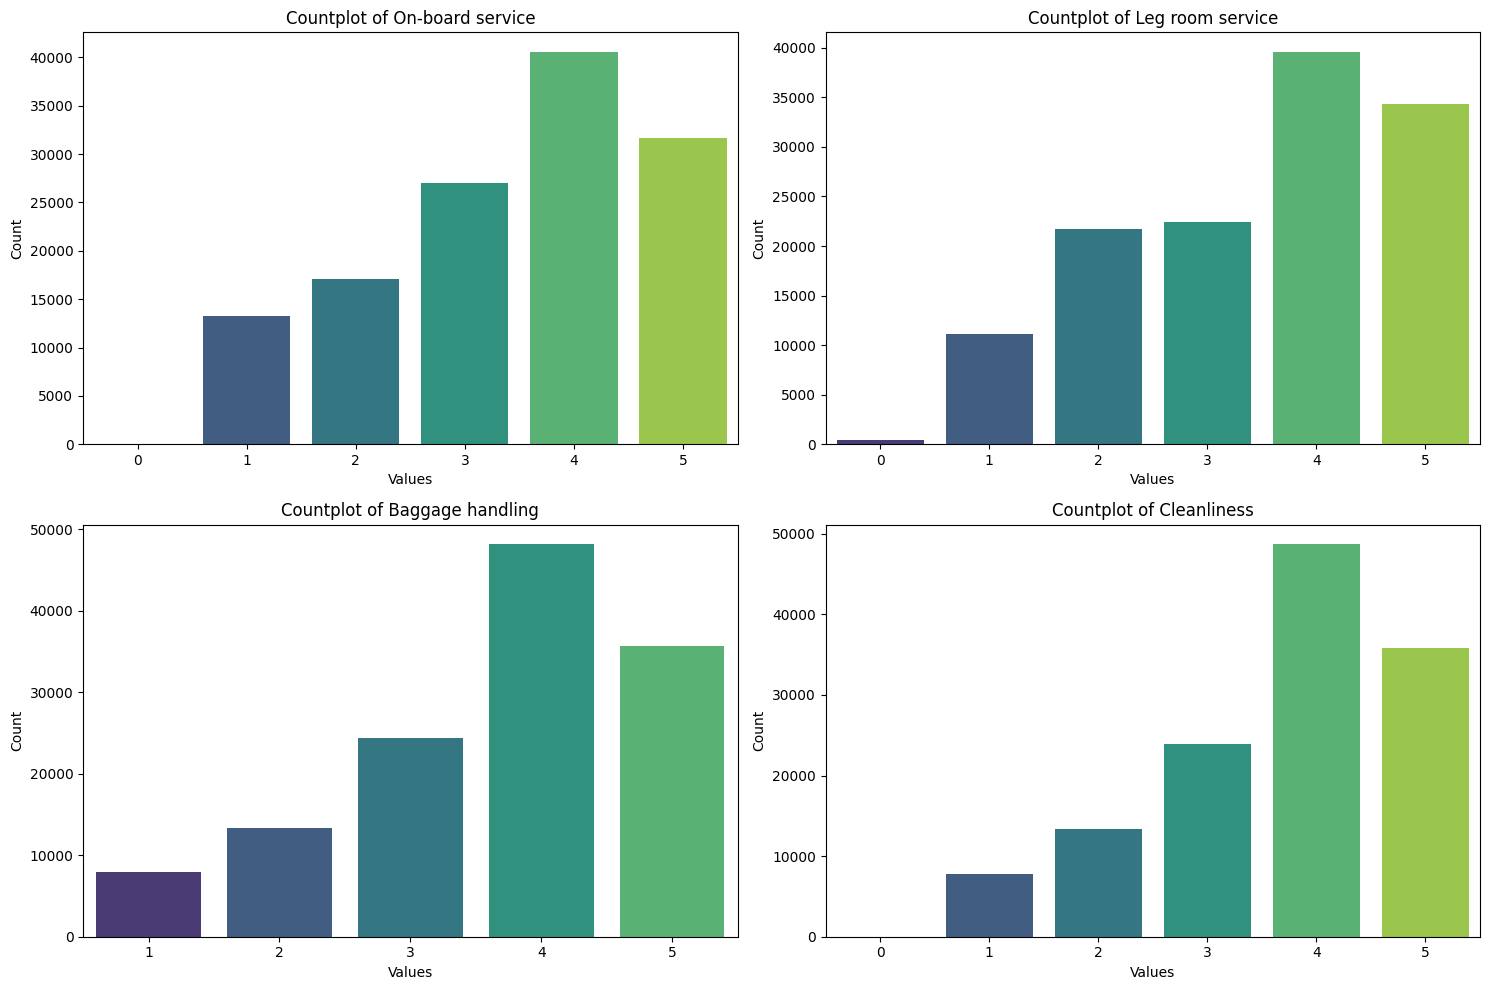

In [48]:
# countplot of correlated facilities
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0] = countplot(df, "On-board service", ax=axs[0, 0])
axs[0, 1] = countplot(df, "Leg room service", ax=axs[0, 1])
axs[1, 0] = countplot(df, "Baggage handling", ax=axs[1, 0])
axs[1, 1] = countplot(df, "Cleanliness", ax=axs[1, 1])

plt.tight_layout()
plt.show()

In [49]:
df["avg_facilities_rating"] = df[['On-board service', 'Leg room service', 'Baggage handling', 'Cleanliness']].mean(axis=1)

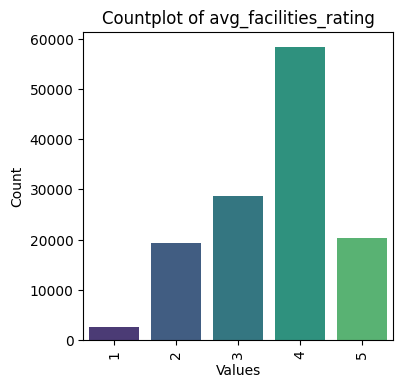

In [50]:
df['avg_facilities_rating'] = df['avg_facilities_rating'].round().astype(int)
countplot(df, "avg_facilities_rating", ax=axs[1, 1], rotate_xticks=90)

#### Categories

In [51]:
df.describe(include="object")

,satisfaction,Gender,Customer Type,Type of Travel,Class,delays
count,129487,129487,129487,129487,129487,129487
unique,2,2,2,2,3,4
top,satisfied,Female,Loyal Customer,Business travel,Business,no delay
freq,70882,65703,105773,89445,61990,63434


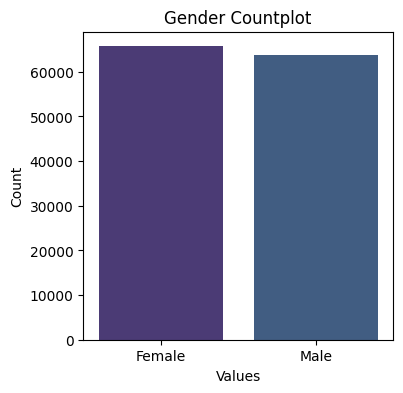

In [52]:
countplot(df, "Gender", title="Gender Countplot")

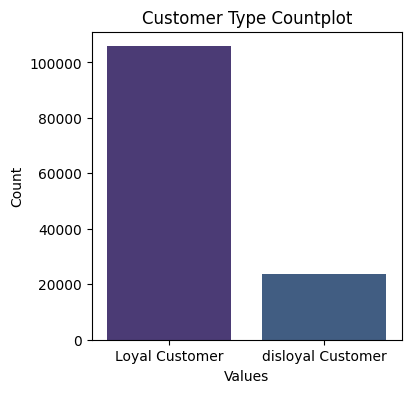

In [53]:
countplot(df, "Customer Type", title="Customer Type Countplot")

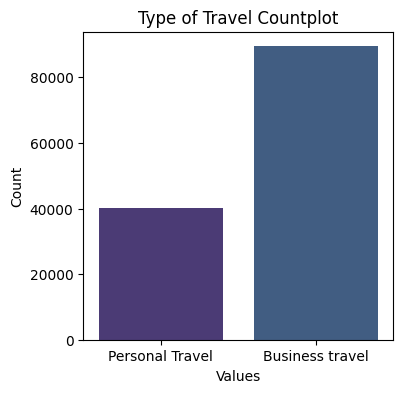

In [54]:
countplot(df, "Type of Travel", title="Type of Travel Countplot")

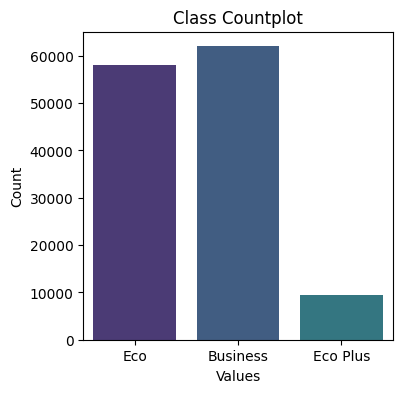

In [55]:
countplot(df, "Class", title="Class Countplot")

#### Target variable

In [56]:
# target variable
df.satisfaction.value_counts()

satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

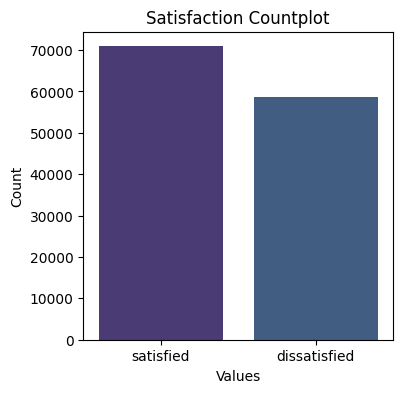

In [57]:
# countplot of target variable
countplot(df, "satisfaction", title="Satisfaction Countplot")

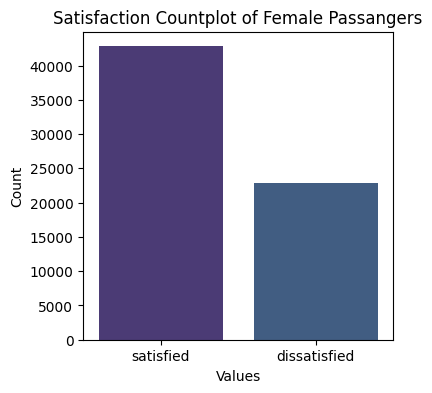

In [58]:
# countplot of female passengers
df1 = df[df["Gender"]=="Female"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Female Passangers")

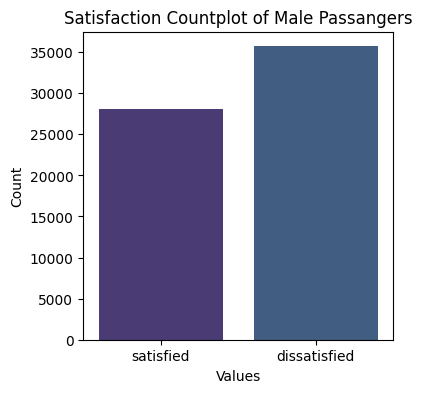

In [59]:
# countplot of male passengers
df1 = df[df["Gender"]=="Male"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Male Passangers")

In [60]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

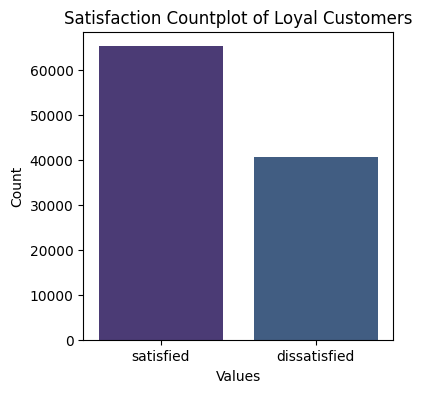

In [61]:
# countplot of loyal customers
df1 = df[df["Customer Type"]=="Loyal Customer"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Loyal Customers")

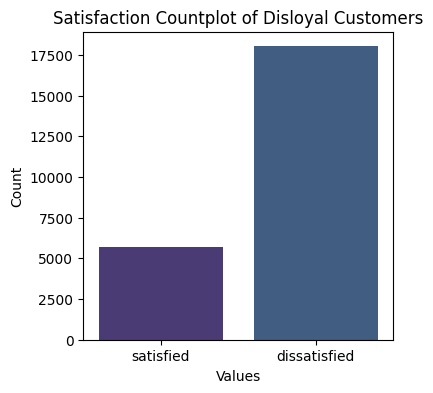

In [62]:
# countplot of disloyal customers
df1 = df[df["Customer Type"]=="disloyal Customer"]
countplot(df1, "satisfaction", title="Satisfaction Countplot of Disloyal Customers")

### Data Preparation

#### Null values

In [63]:
# null values were removed earlier instead
#df = df.dropna()
#df = df.reset_index(drop=True)

#### Renaming columns

In [64]:
# renaming rules
df.rename(columns=lambda x: x.replace(' service', ''), inplace=True)
df.rename(columns=lambda x: x.replace('Inflight ', ''), inplace=True)
df.rename(columns=lambda x: x.replace(' in Minutes', ''), inplace=True)

# renaming single columns
df.rename(columns={'Ease_of_Online_booking': 'online_booking'}, inplace=True)
df.rename(columns={'Food_and_drink': 'food'}, inplace=True)
df.rename(columns={'Departure/Arrival time convenient': 'flight_schedule'}, inplace=True)
df.rename(columns={'Type_of_Travel': 'type'}, inplace=True)

# underscores
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# making all lowercase
df.columns = df.columns.str.lower()

#### Splitting target

In [65]:
y = df.satisfaction

In [66]:
X = df.drop("satisfaction", axis=1)

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   gender                  129487 non-null  object  
 1   customer_type           129487 non-null  object  
 2   age                     129487 non-null  int64   
 3   type_of_travel          129487 non-null  object  
 4   class                   129487 non-null  object  
 5   flight_distance         129487 non-null  int64   
 6   seat_comfort            129487 non-null  int64   
 7   flight_schedule         129487 non-null  int64   
 8   food_and_drink          129487 non-null  int64   
 9   gate_location           129487 non-null  int64   
 10  wifi                    129487 non-null  int64   
 11  entertainment           129487 non-null  int64   
 12  online_support          129487 non-null  int64   
 13  ease_of_online_booking  129487 non-null  int64   
 14  on-b

#### Binning Age

In [68]:
# Define bins for every 10 years up to 90
bins = [i for i in range(0, 91, 10)]

# Create labels for the bins
labels = [f'{i}-{i+9}' for i in range(0, 81, 10)]  # Adjusted labels

# Use pd.cut to bin the 'age' column and create the new column
X['age'] = pd.cut(X['age'], bins=bins, labels=labels, right=False)

#### Binning Flight Time Difference

In [69]:
df["flight_time_difference"].describe()

count    129487.000000
mean         -0.447744
std          10.078293
min        -234.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          54.000000
Name: flight_time_difference, dtype: float64

#### Encoding

In [70]:
X

,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,flight_schedule,food_and_drink,gate_location,...,checkin,cleanliness,online_boarding,departure_delay,flight_time_difference,flight_speed,delays,avg_amenities_ratings,avg_online_services,avg_facilities_rating
0,Female,Loyal Customer,60-69,Personal Travel,Eco,265,0,0,0,2,...,5,3,2,0,0.0,slower,no delay,0,3,2
1,Male,Loyal Customer,40-49,Personal Travel,Business,2464,0,0,0,3,...,2,3,2,310,5.0,quicker,both delayed,1,2,4
2,Female,Loyal Customer,10-19,Personal Travel,Eco,2138,0,0,0,3,...,4,4,2,0,0.0,slower,no delay,1,2,4
3,Female,Loyal Customer,60-69,Personal Travel,Eco,623,0,0,0,3,...,4,1,3,0,0.0,slower,no delay,1,3,1
4,Female,Loyal Customer,70-79,Personal Travel,Eco,354,0,0,0,3,...,4,2,5,0,0.0,slower,no delay,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,Female,disloyal Customer,20-29,Personal Travel,Eco,1731,5,5,5,3,...,4,4,2,0,0.0,slower,no delay,4,3,4
129483,Male,disloyal Customer,60-69,Personal Travel,Business,2087,2,3,2,4,...,1,2,1,174,2.0,quicker,both delayed,3,2,2
129484,Male,disloyal Customer,60-69,Personal Travel,Eco,2320,3,0,3,3,...,2,3,2,155,-8.0,slower,both delayed,2,3,4
129485,Male,disloyal Customer,60-69,Personal Travel,Eco,2450,3,2,3,2,...,2,1,2,193,-12.0,slower,both delayed,2,2,2


In [71]:
# continuous columns will be scaled
X_numeric = X[["flight_distance", "departure_delay", "flight_time_difference"]]
X_ranks = X.drop(X_numeric.columns, axis=1)

# label encoding binary categories
X_binary = X[["gender", "customer_type", "type_of_travel"]]
X_ranks = X_ranks.drop(X_binary.columns, axis=1)

In [72]:
# binary categories encoded
X_binary = pd.get_dummies(X_binary, columns=X_binary.columns, drop_first=True).astype(int)
X_binary.head()

,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel
0,0,0,1
1,1,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [73]:
# rest of independent encoding
X_ranks = pd.get_dummies(X_ranks, columns=X_ranks.columns).astype(int)
X_ranks.head()

,age_0-9,age_10-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,class_Business,...,avg_online_services_1,avg_online_services_2,avg_online_services_3,avg_online_services_4,avg_online_services_5,avg_facilities_rating_1,avg_facilities_rating_2,avg_facilities_rating_3,avg_facilities_rating_4,avg_facilities_rating_5
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [74]:
# target variable
y

0            satisfied
1            satisfied
2            satisfied
3            satisfied
4            satisfied
              ...     
129482       satisfied
129483    dissatisfied
129484    dissatisfied
129485    dissatisfied
129486    dissatisfied
Name: satisfaction, Length: 129487, dtype: object

In [75]:
# label encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [76]:
# satisfied is 1, unsatisfied 0
y

array([1, 1, 1, ..., 0, 0, 0])

#### Scaling

In [77]:
X_binary.shape

(129487, 3)

In [78]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [79]:
X_numeric = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns)

#### merge X

In [80]:
X_prepared = pd.concat([X_numeric, X_binary], axis=1)

In [81]:
X_prepared = pd.concat([X_prepared, X_ranks], axis=1)

In [82]:
X_prepared

,flight_distance,departure_delay,flight_time_difference,gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,age_0-9,age_10-19,age_20-29,age_30-39,...,avg_online_services_1,avg_online_services_2,avg_online_services_3,avg_online_services_4,avg_online_services_5,avg_facilities_rating_1,avg_facilities_rating_2,avg_facilities_rating_3,avg_facilities_rating_4,avg_facilities_rating_5
0,-1.671090,-0.386036,0.044427,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0.470348,7.786328,0.540544,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.152882,-0.386036,0.044427,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,-1.322461,-0.386036,0.044427,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,-1.584420,-0.386036,0.044427,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,-0.243465,-0.386036,0.044427,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
129483,0.103217,4.201033,0.242874,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
129484,0.330117,3.700146,-0.749362,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
129485,0.456714,4.701920,-1.146256,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


#### drop duplicates

In [83]:
X_prepared.shape

(129487, 124)

In [84]:
df_no_duplicates = X_prepared.drop_duplicates()
df_no_duplicates.shape

(129485, 124)

#### Correlations

In [85]:
y_df = pd.DataFrame(y, columns=['satisfaction'])
merged_df = pd.concat([X_prepared, y_df], axis=1)

correlation shape: (125, 125)


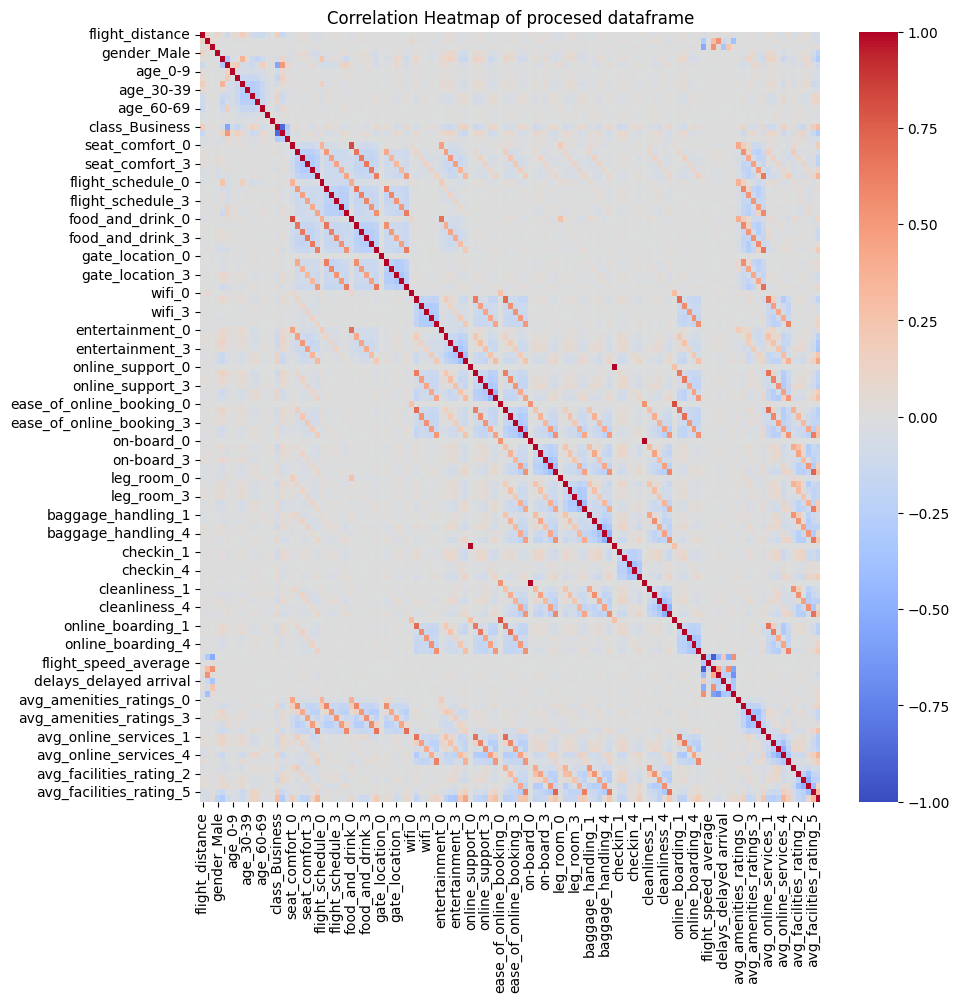

In [86]:
# correlation matrix
correlation_matrix = merged_df.corr()
print(f"correlation shape: {correlation_matrix.shape}")

# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of procesed dataframe')
plt.show()

#### Sampling data

In [87]:
y_df

,satisfaction
0,1
1,1
2,1
3,1
4,1
...,...
129482,1
129483,0
129484,0
129485,0


In [88]:
samplesize= 5000
rus = RandomUnderSampler(random_state=42, sampling_strategy={0:samplesize, 1:samplesize})

X_prepared_sample, y_sample = rus.fit_resample(X_prepared, y)

#### Training and test splits

In [89]:
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_prepared_sample, y_sample, test_size=0.1, random_state=121)

print("X_train_10:", X_train_10.shape, "X_test_10:", X_test_10.shape, "y_train_10:", y_train_10.shape, "y_test_10:", y_test_10.shape)

X_train_10: (9000, 124) X_test_10: (1000, 124) y_train_10: (9000,) y_test_10: (1000,)


In [90]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_prepared_sample, y_sample, test_size=0.2, random_state=121)

print("X_train_20:", X_train_20.shape, "X_test_20:", X_test_20.shape, "y_train_20:", y_train_20.shape, "y_test_20:", y_test_20.shape)

X_train_20: (8000, 124) X_test_20: (2000, 124) y_train_20: (8000,) y_test_20: (2000,)


In [91]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_prepared_sample, y_sample, test_size=0.3, random_state=121)

print("X_train_30:", X_train_30.shape, "X_test_30:", X_test_30.shape, "y_train_30:", y_train_30.shape, "y_test_30:", y_test_30.shape)

X_train_30: (7000, 124) X_test_30: (3000, 124) y_train_30: (7000,) y_test_30: (3000,)


#### Dimensionality reduction | Principal Component Analysis

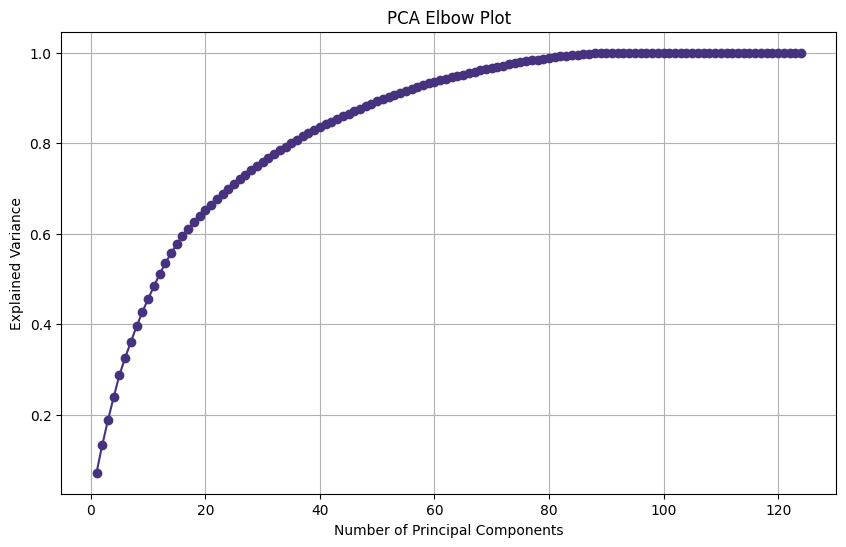

In [92]:
# plotting PCA on sample
num_components = min(X_prepared_sample.shape[0], X_prepared_sample.shape[1])
explained_variance = np.zeros(num_components)

for i in range(1, num_components + 1):
    pca = PCA(n_components=i)
    pca.fit(X_prepared_sample)
    explained_variance[i - 1] = np.sum(pca.explained_variance_ratio_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components + 1), explained_variance, marker='o')
plt.title('PCA Elbow Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [93]:
# using 99.5% variance as the elbow is hard to see.. it uses 75 components which seems right 
# pca 99.5% variance
pca = PCA(n_components=0.995)

# same transformation on train and test
X_train_pca_10 = pca.fit_transform(X_train_10)
X_test_pca_10 = pca.transform(X_test_10)

In [94]:
print(X_train_10.shape)
print(X_train_pca_10.shape)

(9000, 124)
(9000, 85)


In [95]:
# pca 99.5% variance
pca = PCA(n_components=0.995)

# same transformation on train and test
X_train_pca_20 = pca.fit_transform(X_train_20)
X_test_pca_20 = pca.transform(X_test_20)

In [96]:
print(X_train_20.shape)
print(X_train_pca_20.shape)

(8000, 124)
(8000, 85)


In [97]:
# pca 99.5% variance
pca = PCA(n_components=0.995)

# same transformation on train and test
X_train_pca_30 = pca.fit_transform(X_train_30)
X_test_pca_30 = pca.transform(X_test_30)

In [98]:
print(X_train_30.shape)
print(X_train_pca_30.shape)

(7000, 124)
(7000, 85)


### Modelling

In [99]:
results_df = pd.DataFrame(columns=["model", "90:10_accuracy", "80:20_accuracy", "70:30_accuracy"])
results_df

,model,90:10_accuracy,80:20_accuracy,70:30_accuracy


#### 90:10 split | Dummy Classifier

In [100]:
model = DummyClassifier(strategy="most_frequent")

model.fit(X_train_pca_10, y_train_10)
predictions = model.predict(X_test_pca_10)

accuracy = accuracy_score(y_test_10, predictions)
print("Accuracy:", accuracy)

new_row_data = {'model': 'Dummy Classifier', '90:10_accuracy': accuracy}
results_df.loc[len(results_df)] = new_row_data

Accuracy: 0.499


#### 90:10 split | Logistic Regression

In [101]:
model = LogisticRegression()

model.fit(X_train_pca_10, y_train_10)
predictions = model.predict(X_test_pca_10)

accuracy = accuracy_score(y_test_10, predictions)
print("Accuracy:", accuracy)

new_row_data = {'model': 'Logistic Regression', '90:10_accuracy': accuracy}
results_df.loc[len(results_df)] = new_row_data

Accuracy: 0.896


#### 90:10 split | KNeighbors Classifier

In [102]:
model = KNeighborsClassifier()

model.fit(X_train_pca_10, y_train_10)
predictions = model.predict(X_test_pca_10)

accuracy = accuracy_score(y_test_10, predictions)
print("Accuracy:", accuracy)

new_row_data = {'model': 'KNeighbors Classifier', '90:10_accuracy': accuracy}
results_df.loc[len(results_df)] = new_row_data

Accuracy: 0.896


#### 90:10 split | Decision Tree Classifier

In [103]:
model = DecisionTreeClassifier()

model.fit(X_train_pca_10, y_train_10)
predictions = model.predict(X_test_pca_10)

accuracy = accuracy_score(y_test_10, predictions)
print("Accuracy:", accuracy)

new_row_data = {'model': 'Decision Tree Classifier', '90:10_accuracy': accuracy}
results_df.loc[len(results_df)] = new_row_data

Accuracy: 0.789


#### 90:10 split | Gaussian NB Classifier

In [104]:
model = GaussianNB()

model.fit(X_train_pca_10, y_train_10)
predictions = model.predict(X_test_pca_10)

accuracy = accuracy_score(y_test_10, predictions)
print("Accuracy:", accuracy)

new_row_data = {'model': 'Gaussian NB Classifier', '90:10_accuracy': accuracy}
results_df.loc[len(results_df)] = new_row_data

Accuracy: 0.809


#### 90:10 split | Support Vector Classifier

In [105]:
model = SVC()

model.fit(X_train_pca_10, y_train_10)
predictions = model.predict(X_test_pca_10)

accuracy = accuracy_score(y_test_10, predictions)
print("Accuracy:", accuracy)

new_row_data = {'model': 'Support Vector Classifier', '90:10_accuracy': accuracy}
results_df.loc[len(results_df)] = new_row_data

Accuracy: 0.931


#### 80:20 split | Dummy Classifier

In [106]:
model = DummyClassifier(strategy="most_frequent")

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
print("Accuracy:", accuracy)

results_df.loc[0, '80:20_accuracy'] = accuracy

Accuracy: 0.499


#### 80:20 split | Logistic Regression

In [107]:
model = LogisticRegression()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
print("Accuracy:", accuracy)

results_df.loc[1, '80:20_accuracy'] = accuracy

Accuracy: 0.903


#### 80:20 split | KNeighbors Classifier

In [108]:
model = KNeighborsClassifier()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
print("Accuracy:", accuracy)

results_df.loc[2, '80:20_accuracy'] = accuracy

Accuracy: 0.901


#### 80:20 split | Decision Tree Classifier

In [109]:
model = DecisionTreeClassifier()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
print("Accuracy:", accuracy)

results_df.loc[3, '80:20_accuracy'] = accuracy

Accuracy: 0.807


#### 80:20 split | Gaussian Naive Baise Classifier

In [110]:
model = GaussianNB()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
print("Accuracy:", accuracy)

results_df.loc[4, '80:20_accuracy'] = accuracy

Accuracy: 0.817


#### 80:20 split | Support Vector Machine Classifier

In [111]:
model = SVC()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
print("Accuracy:", accuracy)

results_df.loc[5, '80:20_accuracy'] = accuracy

Accuracy: 0.94


#### 70:30 split | Dummy Classifier

In [112]:
model = DummyClassifier(strategy="most_frequent")

model.fit(X_train_pca_30, y_train_30)
predictions = model.predict(X_test_pca_30)

accuracy = accuracy_score(y_test_30, predictions)
print("Accuracy:", accuracy)

results_df.loc[0, '70:30_accuracy'] = accuracy

Accuracy: 0.499


#### 70:30 split | Logistic Regression

In [113]:
model = LogisticRegression()

model.fit(X_train_pca_30, y_train_30)
predictions = model.predict(X_test_pca_30)

accuracy = accuracy_score(y_test_30, predictions)
print("Accuracy:", accuracy)

results_df.loc[1, '70:30_accuracy'] = accuracy

Accuracy: 0.9006666666666666


#### 70:30 split | KNeighbors Classifier

In [114]:
model = KNeighborsClassifier()

model.fit(X_train_pca_30, y_train_30)
predictions = model.predict(X_test_pca_30)

accuracy = accuracy_score(y_test_30, predictions)
print("Accuracy:", accuracy)

results_df.loc[2, '70:30_accuracy'] = accuracy

Accuracy: 0.899


#### 70:30 split | Decision Tree Classifier

In [115]:
model = DecisionTreeClassifier()

model.fit(X_train_pca_30, y_train_30)
predictions = model.predict(X_test_pca_30)

accuracy = accuracy_score(y_test_30, predictions)
print("Accuracy:", accuracy)

results_df.loc[3, '70:30_accuracy'] = accuracy

Accuracy: 0.7953333333333333


#### 70:30 split | Gaussian NB Classifier

In [116]:
model = GaussianNB()

model.fit(X_train_pca_30, y_train_30)
predictions = model.predict(X_test_pca_30)

accuracy = accuracy_score(y_test_30, predictions)
print("Accuracy:", accuracy)

results_df.loc[4, '70:30_accuracy'] = accuracy

Accuracy: 0.8073333333333333


#### 70:30 split | Support Vector Machine Classifier

In [117]:
model = SVC()

model.fit(X_train_pca_30, y_train_30)
predictions = model.predict(X_test_pca_30)

accuracy = accuracy_score(y_test_30, predictions)
print("Accuracy:", accuracy)

results_df.loc[5, '70:30_accuracy'] = accuracy

Accuracy: 0.9326666666666666


#### Training and test split results

In [118]:
results_df

,model,90:10_accuracy,80:20_accuracy,70:30_accuracy
0,Dummy Classifier,0.499,0.499,0.499000
1,Logistic Regression,0.896,0.903,0.900667
2,KNeighbors Classifier,0.896,0.901,0.899000
3,Decision Tree Classifier,0.789,0.807,0.795333
4,Gaussian NB Classifier,0.809,0.817,0.807333
5,Support Vector Classifier,0.931,0.940,0.932667


#### Cross Validation | Dummy Classifer

In [119]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', DummyClassifier())
])


cv_scores = cross_val_score(pipeline, X_prepared_sample, y_sample, cv=5, scoring='accuracy')


print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

results_df.loc[0, 'CV_accuracy'] = cv_scores.mean()

Cross-validation Scores: [0.5 0.5 0.5 0.5 0.5]
Mean Accuracy: 0.5


#### Cross Validation | Logistic Regression

In [120]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', LogisticRegression())
])


cv_scores = cross_val_score(pipeline, X_prepared_sample, y_sample, cv=5, scoring='accuracy')


print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

results_df.loc[1, 'CV_accuracy'] = cv_scores.mean()

Cross-validation Scores: [0.8995 0.9085 0.9045 0.9035 0.896 ]
Mean Accuracy: 0.9023999999999999


#### Cross Validation | KNeighboiurs Classifier

In [121]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', KNeighborsClassifier())
])


cv_scores = cross_val_score(pipeline, X_prepared_sample, y_sample, cv=5, scoring='accuracy')


print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

results_df.loc[2, 'CV_accuracy'] = cv_scores.mean()

Cross-validation Scores: [0.899  0.912  0.903  0.9085 0.8985]
Mean Accuracy: 0.9042


In [122]:
#### Cross Validation | Decision Tree Classifier

In [123]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', DecisionTreeClassifier())
])


cv_scores = cross_val_score(pipeline, X_prepared_sample, y_sample, cv=5, scoring='accuracy')


print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

results_df.loc[3, 'CV_accuracy'] = cv_scores.mean()

Cross-validation Scores: [0.8105 0.798  0.8005 0.819  0.8015]
Mean Accuracy: 0.8059


#### Cross Validation | Gaussian NB Classifier

In [124]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', GaussianNB())
])


cv_scores = cross_val_score(pipeline, X_prepared_sample, y_sample, cv=5, scoring='accuracy')


print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

results_df.loc[4, 'CV_accuracy'] = cv_scores.mean()

Cross-validation Scores: [0.8295 0.812  0.81   0.8095 0.8145]
Mean Accuracy: 0.8150999999999999


#### Cross Validation | Support Vector Machione Classifer

In [125]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', SVC())
])


cv_scores = cross_val_score(pipeline, X_prepared_sample, y_sample, cv=5, scoring='accuracy')


print("Cross-validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

results_df.loc[5, 'CV_accuracy'] = cv_scores.mean()

Cross-validation Scores: [0.9325 0.939  0.935  0.9415 0.926 ]
Mean Accuracy: 0.9347999999999999


#### Cross Validation Results

In [126]:
results_df

,model,90:10_accuracy,80:20_accuracy,70:30_accuracy,CV_accuracy
0,Dummy Classifier,0.499,0.499,0.499000,0.5000
1,Logistic Regression,0.896,0.903,0.900667,0.9024
2,KNeighbors Classifier,0.896,0.901,0.899000,0.9042
3,Decision Tree Classifier,0.789,0.807,0.795333,0.8059
4,Gaussian NB Classifier,0.809,0.817,0.807333,0.8151
5,Support Vector Classifier,0.931,0.940,0.932667,0.9348


### Evaluation

#### Classification Report & Confusion Matrix | Logistic Regression

In [127]:
model = LogisticRegression()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
report = classification_report(y_test_20, predictions)

print("Logistic Regression Classifier Accuracy:", accuracy)
print("Logistic Regression Classifier Classification Report:")
print(report)

Logistic Regression Classifier Accuracy: 0.903
Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1002
           1       0.92      0.89      0.90       998

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



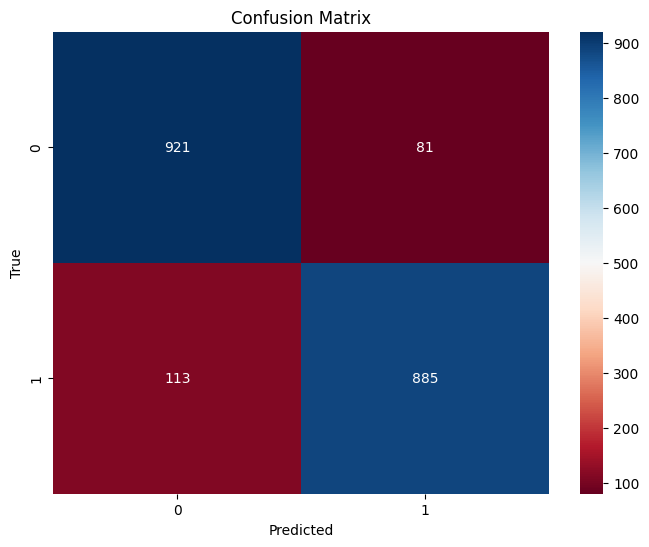

In [128]:
plot_confusion_matrix(y_test_20, predictions)

#### Classification Report & Confusion Matrix | KNeighbors Classifier

In [129]:
model = KNeighborsClassifier()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
report = classification_report(y_test_20, predictions)

print("Logistic Regression Classifier Accuracy:", accuracy)
print("Logistic Regression Classifier Classification Report:")
print(report)

Logistic Regression Classifier Accuracy: 0.901
Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1002
           1       0.91      0.89      0.90       998

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



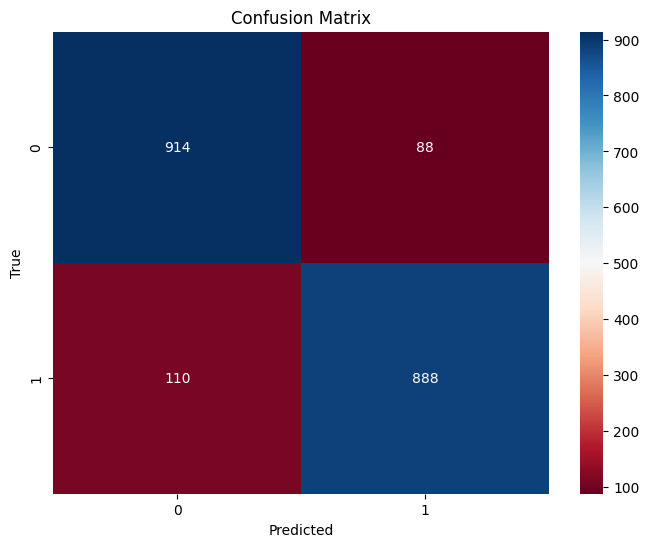

In [130]:
plot_confusion_matrix(y_test_20, predictions)

#### Classification Report & Confusion Matrix | Support Vector Classifier

In [131]:
model = SVC()

model.fit(X_train_pca_20, y_train_20)
predictions = model.predict(X_test_pca_20)

accuracy = accuracy_score(y_test_20, predictions)
report = classification_report(y_test_20, predictions)

print("Logistic Regression Classifier Accuracy:", accuracy)
print("Logistic Regression Classifier Classification Report:")
print(report)

Logistic Regression Classifier Accuracy: 0.94
Logistic Regression Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1002
           1       0.96      0.91      0.94       998

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



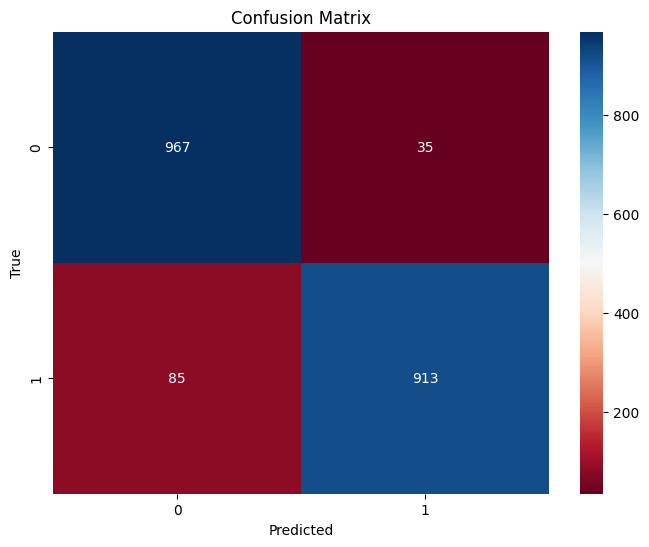

In [132]:
plot_confusion_matrix(y_test_20, predictions)

#### Grid Search Cross Validation | Logistic Regression

In [133]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', LogisticRegression())
])
param_grid = {
    "model__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "model__penalty": ["l1", "l2", "elasticnet"],
    "model__solver": ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    "model__max_iter": [50, 100, 200, 500],
    "model__class_weight": [None, 'balanced', {0: 1, 1: 2}]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_prepared_sample, y_sample)

best_model = grid_search.best_estimator_
print(best_model)

KeyboardInterrupt: 

In [ ]:
print("Best Model Accuracy:", grid_search.best_score_)
print("Best model penalty:", grid_search.best_params_["model__penalty"])
print("Best model C:", grid_search.best_params_["model__C"])

#### Grid Search Cross Validation | Support Vector Classifier

In [ ]:
pipeline = Pipeline([
    ('pca', PCA(n_components=0.995)),
    ('model', SVC())
])
param_grid = {
    "model__C": [0.001, 0.01, 0.1, 1, 10, 100]#,
    #"model__penalty": ["l1", "l2", "elasticnet"]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_prepared_sample, y_sample)

best_model = grid_search.best_estimator_
print(best_model)

In [ ]:
print("Best Model Accuracy:", grid_search.best_score_)
print("Best classifier__C:", grid_search.best_params_["model__C"])